In [37]:
print("Merhaba, İGÜ - İSTKA / Ders 9") # print ekrana çıktı veren bir koddur.

Merhaba, İGÜ - İSTKA / Ders 9


In [36]:
import sys # import python programlama dilinde yazılıma kütüphane eklemeye yarayan bir kod blogudur.
print(sys.version)

3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]


In [35]:
from google.colab import drive # google colab - drive bağlantısı

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import os

os.chdir('/content/drive/My Drive/VERIYAPILARI_ISTKA')

!pwd # bize kodun çıktısını dosya yolu olarak veren kod blogudur.


/content/drive/My Drive/VERIYAPILARI_ISTKA


VERİ YAPILARI ve ALGORİTMALAR:
Sıralama, Arama ve Graf Algoritmaları

In [39]:
import pandas as pd

VeriSetiYolu = '/content/drive/My Drive/VERIYAPILARI_ISTKA/veriseti'

for file in os.listdir(VeriSetiYolu):                         # Klasördeki tüm dosyaları listele

    if file.endswith(('.xlsx', '.xls')):                     # Sadece Excel dosyalarını seç

        df = pd.read_excel(os.path.join(VeriSetiYolu, file))  # Excel dosyasını pandas ile oku

        df.to_csv(os.path.join(VeriSetiYolu, file.rsplit('.', 1)[0] + '.csv'), index=False)
                                                               # DataFrame'i CSV formatında kaydet
        print(f"{file} dosyası CSV formatına çevrildi.")     # Çevrim İşlemi Çıktısı

# İşlem tamamlandığında kaç tane excel dosyası var ise o kadar *.csv formatına çevildiğinin
# bilgisini almaktayız

atktan-geri-kazanm-miktarlar (1).xlsx dosyası CSV formatına çevrildi.


In [40]:
import os
import pandas as pd

VeriSetiYolu = '/content/drive/My Drive/VERIYAPILARI_ISTKA/veriseti'

# VeriSetiYolu içindeki .csv dosyalarını bul ve say
csv_dosyaları = [dosya for dosya in os.listdir(VeriSetiYolu) if dosya.endswith('.csv')]

# .csv dosya sayısını ekrana yazdır
csv_dosya_sayisi = len(csv_dosyaları)
print(f"VeriSetiYolu içerisinde {csv_dosya_sayisi} tane .csv dosyası bulunuyor.")

VeriSetiYolu içerisinde 4 tane .csv dosyası bulunuyor.


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasını oku
dosya_yolu = '/content/drive/My Drive/VERIYAPILARI_ISTKA/veriseti/ilcesuveriseti.csv'
csv_dosya = pd.read_csv(dosya_yolu)

print(csv_dosya)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/VERIYAPILARI_ISTKA/veriseti/ilcesuveriseti.csv'

In [43]:
# Veri setinin yolunun gösterimi ve yüklemesi
VeriSetiYolu = '/content/drive/My Drive/VERIYAPILARI_ISTKA/veriseti/ilcesuveriseti .csv'
data = pd.read_csv(VeriSetiYolu, delimiter=';')

# ; verilerini temizleyip , verisini dönüştürme işlemidir.
for i in data.columns[2:]:
    data[i] = data[i].str.replace('.', '').astype(int)

print(data.head())

   ID       ILCELER      2015      2016      2017      2018      2019  \
0   1        ADALAR   1432494   1472276   1366581   1399182   1371291   
1   2    ARNAVUTKOY   8002123   9178953  10176132  11404878  13818204   
2   3      ATASEHIR  18597049  19974097  21205911  21496185  22428468   
3   4       AVCILAR  16220476  17052253  17558403  18312736  19485453   
4   5  BUYUKCEKMECE   9915435  10788924  11172787  12222470  13606571   

       2020      2021      2022  
0   1513070   1435991   1543403  
1  15570466  17102127  18891299  
2  23737630  24281319  24377611  
3  20824893  20690506  21556002  
4  16015731  16167480  17412198  


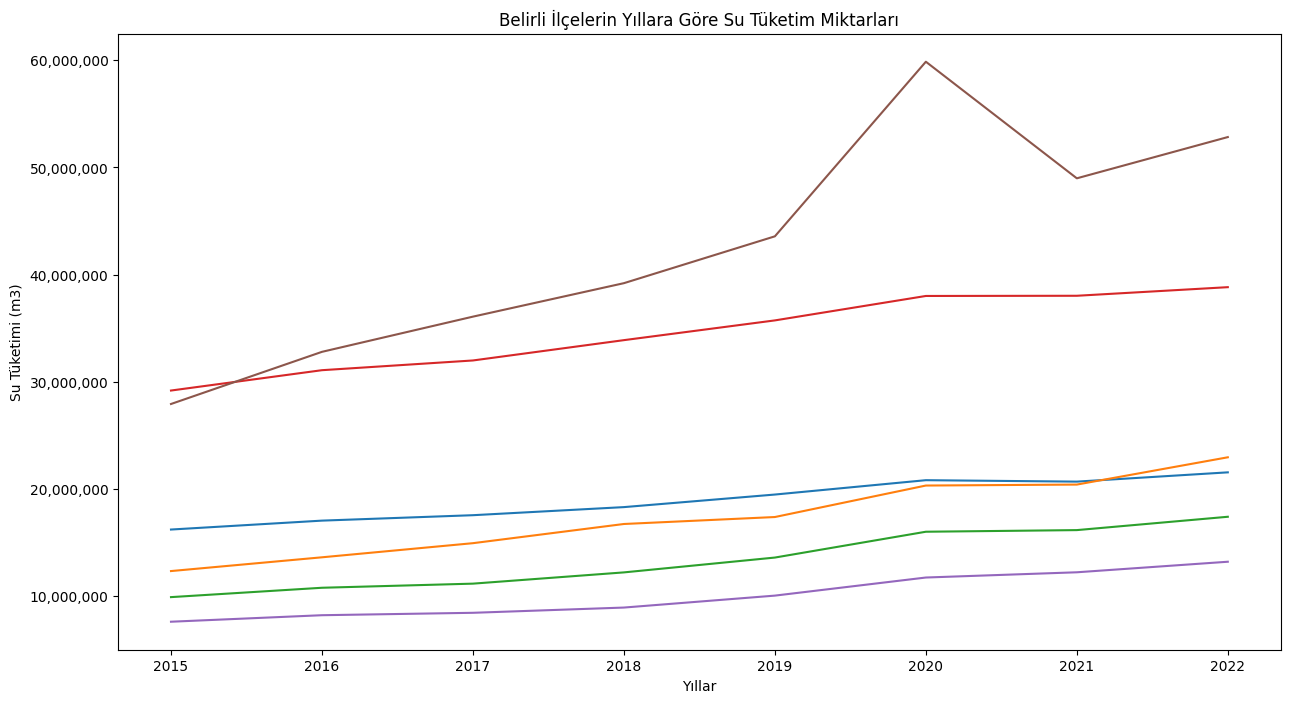

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Veri setini yükleme ve temizleme
data = pd.read_csv(VeriSetiYolu, delimiter=';')

# Sayısal kolonlardaki verileri temizleyip sayıya dönüştürme
for i in data.columns[2:]:
    data[i] = data[i].str.replace('.', '').astype(int)

# Belirtilen ilçeler için veriyi filtreleme
ilceler = ["AVCILAR", "BEYLIKDUZU", "BUYUKCEKMECE", "KUCUKCEKMECE", "SILIVRI", "ESENYURT"]
filtre = data[data['ILCELER'].isin(ilceler)]

# Seçilen ilçeler için yıllık su tüketim miktarlarını çizme
plt.figure(figsize=(15, 8))

for ilce in ilceler:
    ilce_data = filtre[filtre['ILCELER'] == ilce]
    plt.plot(data.columns[2:], ilce_data.iloc[0, 2:], label=ilce)

plt.xlabel('Yıllar')
plt.ylabel('Su Tüketimi (m3)')
plt.title('Belirli İlçelerin Yıllara Göre Su Tüketim Miktarları')

# Y eksenine binlik ayırıcı ekleme
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))


In [45]:
!pip install plotly

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Veri setini yükleme ve temizleme
data = pd.read_csv(VeriSetiYolu, delimiter=';')

# Sayısal kolonlardaki verileri temizleyip sayıya dönüştürme
for i in data.columns[2:]:
    data[i] = data[i].str.replace('.', '').astype(int)

# Belirtilen ilçeler için veriyi filtreleme
ilce_bilgileri = ["AVCILAR", "BEYLIKDUZU", "BUYUKCEKMECE", "KUCUKCEKMECE", "SILIVRI", "ESENYURT"]
filtre = data[data['ILCELER'].isin(ilce_bilgileri)]

# Plotly kullanarak interaktif grafik oluşturma
fig = go.Figure()

for ilce in ilce_bilgileri:
    ilce_data = filtre[filtre['ILCELER'] == ilce]
    fig.add_trace(go.Scatter(
         x=data.columns[2:],
         y=ilce_data.iloc[0, 2:],
         mode='lines+markers',
         line=dict(width=3),
         name=ilce
        ))

fig.update_layout(
        title='AVCILAR, BEYLIKDUZU, BUYUKCEKMECE, KUCUKCEKMECE, SILIVRI, ESENYURT İlçelerin Yıllara Göre Su Tüketim Miktarları',
        xaxis_title='Yıllar',
        yaxis_title='Su Tüketimi (m3)',
        yaxis=dict(tickformat=','),
        template='plotly_white'
)

fig.show()

In [47]:
# 1. Kabarcık (Bubble) Sıralama Algoritması

dizi = [64, 34, 90, 1]

def kabarcikalgoritmasi(dizi):
    n = len(dizi)  # 1. Adım: Dizinin uzunluğunu alır ve n değişkenine atar.
    for i in range(n):  # 2. Adım: i değişkeni 0'dan n-1'e kadar döner, bu dış döngüdür.
        for j in range(0, n-i-1):  # 3. Adım: j değişkeni, 0'dan n-i-1'e kadar döner, bu iç döngüdür.
            if dizi[j] > dizi[j+1]:  # 4. Adım: Şu anki eleman ile bir sonraki elemanı karşılaştırır.
               dizi[j], dizi[j+1] = dizi[j+1], dizi[j]  # 5. Adım: Eğer şu anki eleman bir sonrakinden büyükse, yer değiştirir.
    return dizi  # 6. Adım: Sıralanmış diziyi döner.

kabarcik_siralama = kabarcikalgoritmasi(dizi)
print("Sıralama Sonucu: ", kabarcik_siralama)

Sıralama Sonucu:  [1, 34, 64, 90]


In [48]:
# 2. Seçim (Selection) Sıralama Algoritması

dizi = [64, 34, 90, 1]

def secimalgoritmasi(dizi):
    n = len(dizi)  # 1. Adım: Dizinin uzunluğunu alır ve 'n' değişkenine atar.
    for i in range(n):  # 2. Adım: 'i' değişkeni 0'dan n-1'e kadar döner. Bu dış döngüdür ve dizinin her öğesini sırasıyla ele alır.
        degisken = i  # 3. Adım: Şu anki döngüdeki en küçük elemanın indeksini 'degisken' olarak kabul eder. Başlangıçta 'i' indeksini alır.
        for j in range(i+1, n):  # 4. Adım: 'j' değişkeni, 'i+1'den n'e kadar döner. Bu iç döngüdür ve 'i'nin sağındaki elemanları tarar.
            if dizi[j] < dizi[degisken]:  # 5. Adım: Eğer 'dizi[j]' değeri 'dizi[degisken]' değerinden küçükse,
                degisken = j  # 6. Adım: 'degisken' güncellenir ve yeni minimum değerin bulunduğu indeks olarak atanır.
        dizi[i], dizi[degisken] = dizi[degisken], dizi[i]  # 7. Adım: 'degisken' ile 'i' indeksi arasındaki elemanlar yer değiştirilir.

    return dizi  # 8. Adım: Sıralanmış diziyi döner.

# Test
secimsiralamasi = secimalgoritmasi(dizi)
print("Sıralama Sonucu:", secimsiralamasi)

Sıralama Sonucu: [1, 34, 64, 90]


In [49]:
# 3. Insertion (Eklemeli) Sıralama Algoritması

dizi = [64, 34, 90, 1]

def eklemelialgoritma(dizi):
    for i in range(1, len(dizi)):  # 1. Adım: 'i' değişkeni 1'den başlayarak dizinin sonuna kadar döner.
        degisken = dizi[i]  # 2. Adım: 'degisken' değişkeni, şu anda incelenen elemanı tutar.
        j = i-1  # 3. Adım: 'j' değişkeni, 'i' indeksinin bir öncesindeki indeksi gösterir.

        while j >= 0 and degisken < dizi[j]:  # 4. Adım: 'degisken', 'dizi[j]'den küçük olduğu sürece ve 'j' 0'dan büyük ya da eşit olduğu sürece döngü devam eder.
            dizi[j + 1] = dizi[j]  # 5. Adım: 'dizi[j]' değerini bir sağa kaydırır.
            j -= 1  # 6. Adım: 'j' indeksini bir azaltır ve döngü devam eder.

        dizi[j + 1] = degisken  # 7. Adım: 'degisken' değişkenini dizi içerisine yerleştirir.

    return dizi  # 8. Adım: Sıralanmış diziyi döner.

eklemelisiralama = eklemelialgoritma(dizi)
print("Secim Sıralaması:", eklemelisiralama)


Secim Sıralaması: [1, 34, 64, 90]
